# Turning Tuesdays

In financial markets, traders talk about the concept of "Turning Tuesday." The idea is that if a market is down for several days in a row, it will never turn around on a Friday because traders don't want to stay in a position over the weekend. Their pessism looms over the weekend. Likewise, on a Monday, traders have been sitting around depressed for the whole weekend (because the market is down) so Monday will stay down. It's on Tuesday that more rational heads prevail, so a down market will more likely "turn around" on a Tuesday.

### There is anectdotal evidence to support this....

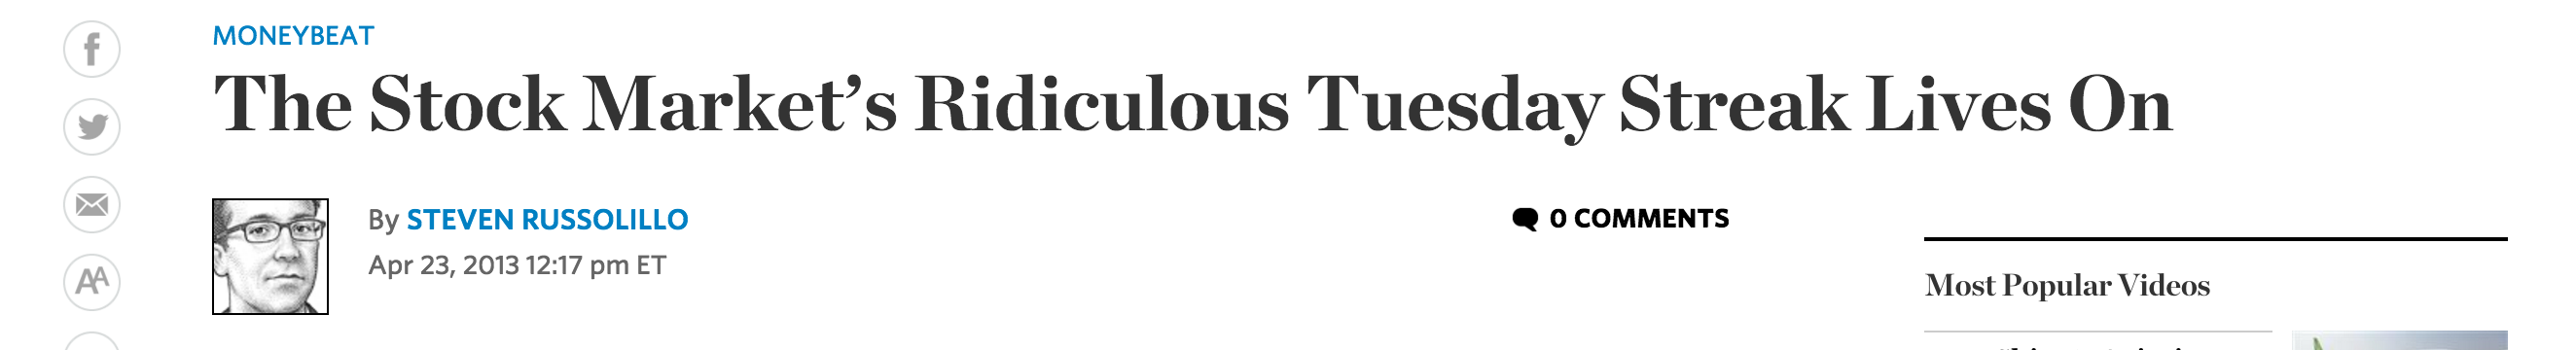

In [1]:
from IPython.display import Image
Image(filename='img/wsj_turnaround_tuesday.png') 

### What does the data say?.... Let's find out!

In [2]:
import pandas as pd

### Get some data!

`#git clone https://github.com/talumbau/strata_data.git`

In [3]:
sp500 = pd.read_csv("data/table.csv", index_col=0, parse_dates=True)

In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,4607290000,1923.670044
2016-01-08,1985.319946,1985.319946,1918.459961,1922.030029,4664940000,1922.030029
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961


In [5]:
sptt = sp500[["Adj Close"]]

In [6]:
sptt.head()

,Adj Close
Date,
2016-01-11,1923.670044
2016-01-08,1922.030029
2016-01-07,1943.089966
2016-01-06,1990.260010
2016-01-05,2016.709961


In [7]:
sptt.tail()

,Adj Close
Date,
1950-01-09,17.08
1950-01-06,16.98
1950-01-05,16.93
1950-01-04,16.85
1950-01-03,16.66


### If you have datetime data, it's almost always the right answer to use pandas


In [8]:
sp500.index

DatetimeIndex(['2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04', '2015-12-31', '2015-12-30',
               '2015-12-29', '2015-12-28',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16613, freq=None)

### First question: which days did the market go up or down?

In [18]:
def rel_change(x):
    return (x[0] - x[1])/x[1]

In [19]:
sptt.assign?

In [32]:
# https://pandas.pydata.org/pandas-docs/version/1.0.0/user_guide/computation.html#stats-rolling-apply
# sptt = sptt.assign(UpDown=pd.rolling_apply(sptt, 2, rel_change))
sptt['UpDown'] = sptt.rolling(window=2).apply(rel_change, raw=True)

<ipython-input-32-5a952310581b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sptt['UpDown'] = sptt.rolling(window=2).apply(rel_change, raw=True)


In [34]:
sptt.head(20)

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,NaN
2016-01-08,1922.030029,0.000853
2016-01-07,1943.089966,-0.010838
2016-01-06,1990.260010,-0.023700
2016-01-05,2016.709961,-0.013115
2016-01-04,2012.660034,0.002012
2015-12-31,2043.939941,-0.015304
2015-12-30,2063.360107,-0.009412
2015-12-29,2078.360107,-0.007217


Hmm... we need to shift the results "up" one. January 11 was an "up" day, but its entry is one row too low in the "UpDown" column

In [35]:
sptt.UpDown = sptt.UpDown.shift(-1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
sptt.head(20)

,Adj Close,UpDown
Date,,
2016-01-11,1923.670044,0.000853
2016-01-08,1922.030029,-0.010838
2016-01-07,1943.089966,-0.023700
2016-01-06,1990.260010,-0.013115
2016-01-05,2016.709961,0.002012
2016-01-04,2012.660034,-0.015304
2015-12-31,2043.939941,-0.009412
2015-12-30,2063.360107,-0.007217
2015-12-29,2078.360107,0.010630


In [37]:
sptt.tail()

,Adj Close,UpDown
Date,,
1950-01-09,17.08,0.005889
1950-01-06,16.98,0.002953
1950-01-05,16.93,0.004748
1950-01-04,16.85,0.011405
1950-01-03,16.66,NaN


### Next question: which day of the week corresponds to each row?

In [38]:
sptt.index

DatetimeIndex(['2016-01-11', '2016-01-08', '2016-01-07', '2016-01-06',
               '2016-01-05', '2016-01-04', '2015-12-31', '2015-12-30',
               '2015-12-29', '2015-12-28',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16613, freq=None)

In [39]:
dir(sptt.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disa

In [40]:
sptt['day_num'] = sptt.index.dayofweek

<ipython-input-40-01c8c7ec58c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sptt['day_num'] = sptt.index.dayofweek


In [48]:
sptt.head(7)

,Adj Close,UpDown,day_num
Date,,,
2016-01-11,1923.670044,0.000853,0
2016-01-08,1922.030029,-0.010838,4
2016-01-07,1943.089966,-0.023700,3
2016-01-06,1990.260010,-0.013115,2
2016-01-05,2016.709961,0.002012,1
2016-01-04,2012.660034,-0.015304,0
2015-12-31,2043.939941,-0.009412,3


### Groupby operations! Do calculations over every value that has the same day of week. Ex:

In [42]:
sptt["Adj Close"].groupby(sptt.index.dayofweek).mean()

Date
0    478.334693
1    487.397694
2    487.905133
3    485.221006
4    484.926614
Name: Adj Close, dtype: float64

### Let's get more specific with the "Turning Tuesday Hypothesis":

We'll say a "down market" is a market where there are three or more days in a row where the market closes lower than it started. So, for example, for a Thursday, we are interested in what has happened on the three previous tradings days (typically the Monday, Tuesday, and Wednesday directly preceding the Thursday). With that as the definition of a "down market", the question is then, 'When we are in a down market, do we return to an up market more frequently on a Tuesday than on other days of the week?'

In [49]:
def last_three_days_down(x):
    if x[1]<=0 and x[2]<=0 and x[3]<=0:
        return 1
    else:
        return 0

In [55]:
# Deprecated
# sptt['ltdd'] = pd.rolling_apply(sptt["UpDown"], 4, last_three_days_down).shift(-3)

In [66]:
sptt['ltdd'] = sptt.UpDown.rolling(window=4).apply(last_three_days_down, raw=True).shift(-3)

<ipython-input-66-a4a57e68a453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sptt['ltdd'] = sptt.UpDown.rolling(window=4).apply(last_three_days_down, raw=True).shift(-3)


In [67]:
sptt.head(10)

,Adj Close,UpDown,day_num,ltdd,turned
Date,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True
2016-01-08,1922.030029,-0.010838,4,0.0,False
2016-01-07,1943.089966,-0.023700,3,0.0,False
2016-01-06,1990.260010,-0.013115,2,0.0,False
2016-01-05,2016.709961,0.002012,1,1.0,True
2016-01-04,2012.660034,-0.015304,0,0.0,False
2015-12-31,2043.939941,-0.009412,3,0.0,False
2015-12-30,2063.360107,-0.007217,2,0.0,False
2015-12-29,2078.360107,0.010630,1,0.0,False


In [68]:
len(sptt)

16613

In [69]:
import numpy as np

In [70]:
sptt.head()

,Adj Close,UpDown,day_num,ltdd,turned
Date,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True
2016-01-08,1922.030029,-0.010838,4,0.0,False
2016-01-07,1943.089966,-0.023700,3,0.0,False
2016-01-06,1990.260010,-0.013115,2,0.0,False
2016-01-05,2016.709961,0.002012,1,1.0,True


In [71]:
sptt['turned'] = (sptt['ltdd'] > 0.) & (sptt['UpDown'] > 0.)

<ipython-input-71-37a4380dc9fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sptt['turned'] = (sptt['ltdd'] > 0.) & (sptt['UpDown'] > 0.)


In [74]:
sptt.head(50)

,Adj Close,UpDown,day_num,ltdd,turned
Date,,,,,
2016-01-11,1923.670044,0.000853,0,1.0,True
2016-01-08,1922.030029,-0.010838,4,0.0,False
2016-01-07,1943.089966,-0.023700,3,0.0,False
2016-01-06,1990.260010,-0.013115,2,0.0,False
2016-01-05,2016.709961,0.002012,1,1.0,True
2016-01-04,2012.660034,-0.015304,0,0.0,False
2015-12-31,2043.939941,-0.009412,3,0.0,False
2015-12-30,2063.360107,-0.007217,2,0.0,False
2015-12-29,2078.360107,0.010630,1,0.0,False


In [75]:
sp_turning_days_totals = sptt.turned.groupby(sptt.index.dayofweek).sum()

In [76]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

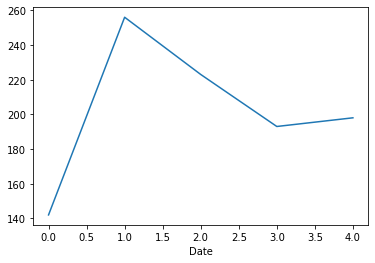

In [78]:
sp_turning_days_totals.plot()

In [79]:
sp_turning_days_totals

Date
0    142
1    256
2    223
3    193
4    198
Name: turned, dtype: int64

### Ta-dah! Tuesdays really are a magic day! Off to start a hedge fund....
#### (please don't actually go and start a hedge fund)

## Try this:

 - What about 2 days down, then 1 up? Is the pattern the same? 4 days?
 - Is the day after a Turning Tuesday usually good? Or not?
 

# What Next?

This is a reasonable introduction to pandas, but it really does take practice. In the years since pandas was released the "DataFrame" idiom, originally taken from the R language (and maybe 'S' before that) has become even more ingrained in data tooling. In fact, it's been borrowed for frameworks meant to scale beyond a single machine, like Spark, or dask in the PyData world:

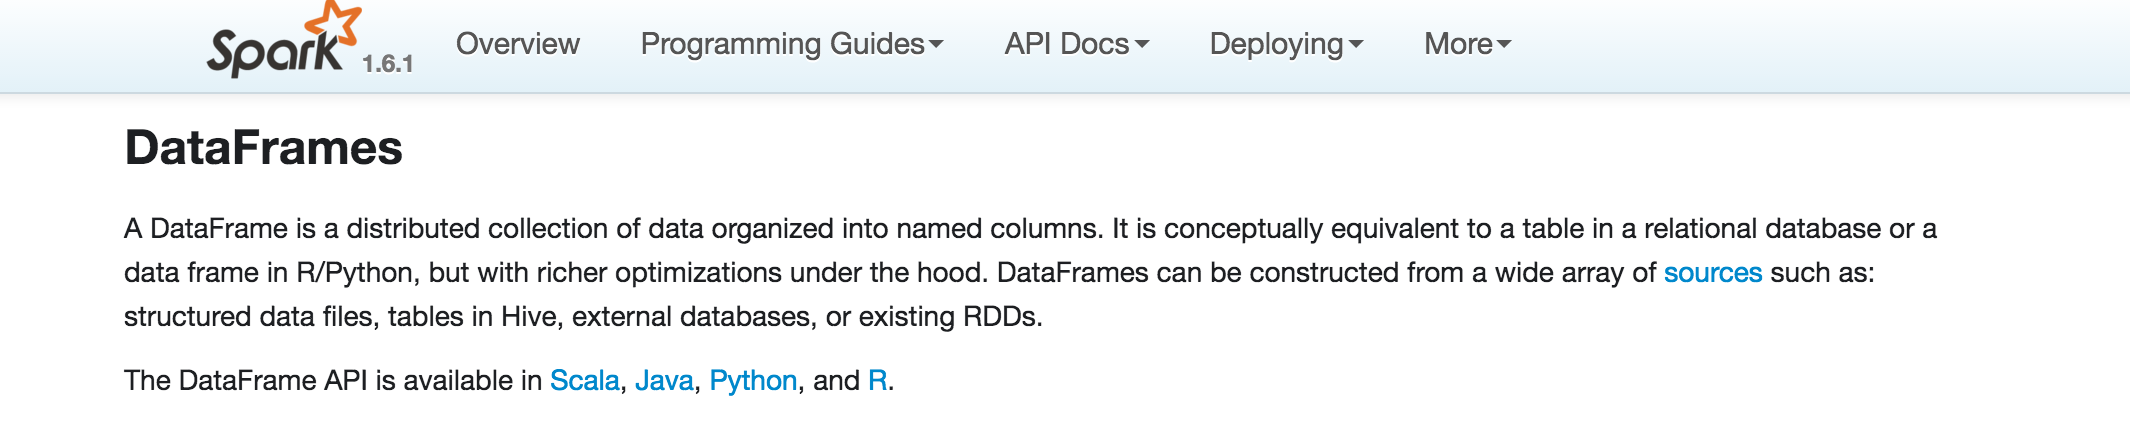

In [80]:

from IPython.display import Image
Image(filename='img/spark_dataframe.png') 

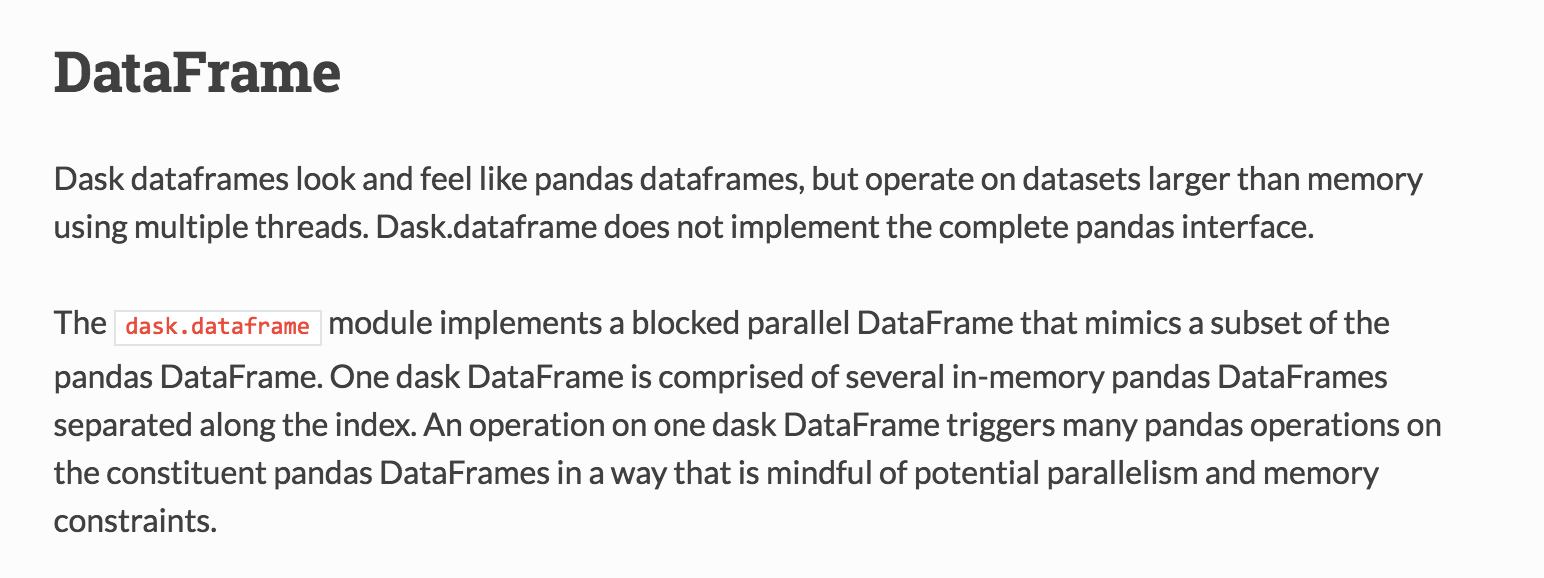

In [81]:
from IPython.display import Image
Image(filename='img/dask_dataframe.png') 

So, it's worth learning your way around pandas, since current and future library authors want to leverage that knowledge to incentivize users to try out their new data tool.

## Thanks for listening!!!

### Send me your thoughts via electrons:

### @talumbau
  
### tj.alumbaugh@continuum.io